# [**Classification multi-étiquettes**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/1_11_ensembles/plot_multilabel.ipynb)<br/>([_Multilabel classification_](https://scikit-learn.org/stable/auto_examples/ensemble/plot_multilabel.html))

Cet exemple simule un problème de classification de documents multi-étiquettes. Le jeu de données est généré de manière aléatoire selon le processus suivant :
- choisissez le nombre d'étiquettes : n ~ Poisson(n_labels)
- n fois, choisissez une classe c : c ~ Multinomial(theta)
- choisissez la longueur du document : k ~ Poisson(length)
- k fois, choisissez un mot : w ~ Multinomial(theta_c)

Dans le processus ci-dessus, l'échantillonnage par rejet est utilisé pour s'assurer que n est supérieur à 2 et que la longueur du document n'est jamais nulle. De même, nous rejetons les classes qui ont déjà été choisies. Les documents assignés aux deux classes sont représentés entourés de deux cercles de couleurs différentes.

La classification est effectuée en projetant sur les deux premières composantes principales trouvées par PCA et CCA à des fins de visualisation, suivie de l'utilisation du méta-classifieur [**`OneVsRestClassifier`**](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier) en utilisant deux SVCs avec des noyaux linéaires pour apprendre un modèle discriminatif pour chaque classe. Notez que PCA est utilisé pour effectuer une réduction de dimensionnalité non supervisée, tandis que CCA est utilisée pour effectuer une réduction de dimensionnalité supervisée.

Remarque : dans le graphique, "échantillons non étiquetés" ne signifie pas que nous ne connaissons pas les étiquettes (comme dans l'apprentissage semi-supervisé), mais simplement que les échantillons n'ont pas d'étiquette.

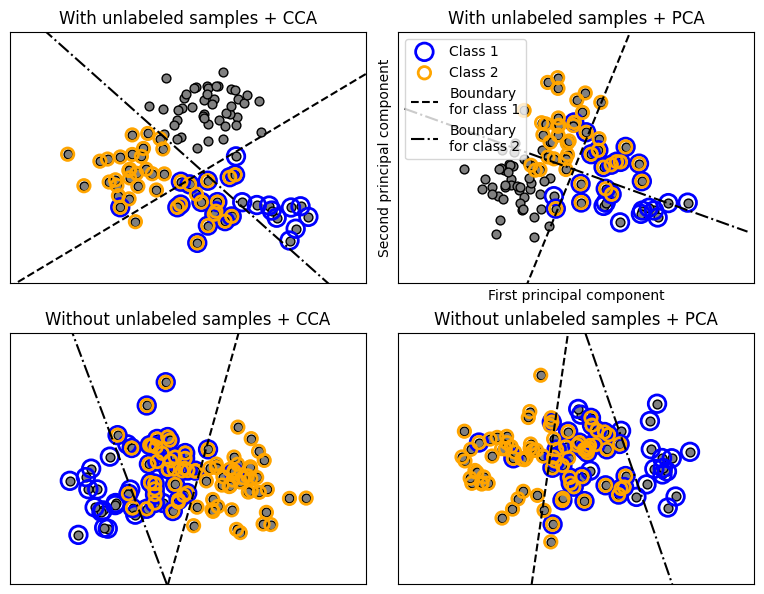

In [1]:
# Authors: Vlad Niculae, Mathieu Blondel
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cross_decomposition import CCA
from sklearn.datasets import make_multilabel_classification
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC


def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)


def plot_subfigure(X, Y, subplot, title, transform):
    if transform == "pca":
        X = PCA(n_components=2).fit_transform(X)
    elif transform == "cca":
        X = CCA(n_components=2).fit(X, Y).transform(X)
    else:
        raise ValueError

    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])

    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])

    classif = OneVsRestClassifier(SVC(kernel="linear"))
    classif.fit(X, Y)

    plt.subplot(2, 2, subplot)
    plt.title(title)

    zero_class = np.where(Y[:, 0])
    one_class = np.where(Y[:, 1])
    plt.scatter(X[:, 0], X[:, 1], s=40, c="gray", edgecolors=(0, 0, 0))
    plt.scatter(
        X[zero_class, 0],
        X[zero_class, 1],
        s=160,
        edgecolors="b",
        facecolors="none",
        linewidths=2,
        label="Class 1",
    )
    plt.scatter(
        X[one_class, 0],
        X[one_class, 1],
        s=80,
        edgecolors="orange",
        facecolors="none",
        linewidths=2,
        label="Class 2",
    )

    plot_hyperplane(
        classif.estimators_[0], min_x, max_x, "k--", "Boundary\nfor class 1"
    )
    plot_hyperplane(
        classif.estimators_[1], min_x, max_x, "k-.", "Boundary\nfor class 2"
    )
    plt.xticks(())
    plt.yticks(())

    plt.xlim(min_x - 0.5 * max_x, max_x + 0.5 * max_x)
    plt.ylim(min_y - 0.5 * max_y, max_y + 0.5 * max_y)
    if subplot == 2:
        plt.xlabel("First principal component")
        plt.ylabel("Second principal component")
        plt.legend(loc="upper left")


plt.figure(figsize=(8, 6))

X, Y = make_multilabel_classification(
    n_classes=2, n_labels=1, allow_unlabeled=True, random_state=1
)

plot_subfigure(X, Y, 1, "With unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 2, "With unlabeled samples + PCA", "pca")

X, Y = make_multilabel_classification(
    n_classes=2, n_labels=1, allow_unlabeled=False, random_state=1
)

plot_subfigure(X, Y, 3, "Without unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 4, "Without unlabeled samples + PCA", "pca")

plt.subplots_adjust(0.04, 0.02, 0.97, 0.94, 0.09, 0.2)
plt.show()